In [10]:
rmg_path = os.getenv('RMGpy')
if rmg_path and rmg_path not in sys.path:
    sys.path.insert(1,rmg_path)

import matplotlib
#matplotlib.use('Agg')
%matplotlib inline
from matplotlib import pyplot as plt



import os
import sys
import numpy as np
import pandas as pd
import scipy.optimize


import Image


rmg_path = os.getenv('RMGpy')
if rmg_path and rmg_path not in sys.path:
    sys.path.insert(1,rmg_path)

import rmgpy.kinetics
import rmgpy.reaction
from rmgpy.molecule import Molecule, Atom
from rmgpy.species import Species
from rmgpy.data.rmg import RMGDatabase 

ImportError: /usr/lib64/libGL.so.1: undefined symbol: xcb_dri2_wait_sbc_reply

In [2]:
mols = [
    "C8H18(2)",
    "C8H18(3)",
    "C8H18(4)",
    "C5H12O(5)",
    "C6H14O(6)",
    "C9H18(7)",
    "C6H12(8)",
    "Ocimene(9)",
    "Xylene(10)",
    "C9H18O(11)",
    "C8H16O(12)",
    "S(13)",
    "C8H18O(14)"
]

colors = [
    "b",
    "g",
    "m",
    "c",
    "r",
    "y",
    "k",
    "b:",
    "m",
    "r:",
    "c:",
    "c",
    "y:"
]

In [3]:
def evalArrhenius(autoTSTExpression):
    if autoTSTExpression is np.nan:
        return autoTSTExpression
    try:
        my_string = str(autoTSTExpression).strip("'")
        #print my_string
        result = eval(my_string, {}, {'Arrhenius': rmgpy.kinetics.Arrhenius,
                                     'MultiArrhenius': rmgpy.kinetics.MultiArrhenius,
                                     'PDepArrhenius': rmgpy.kinetics.PDepArrhenius,})
    except:
        result = autoTSTExpression
        raise
    return result

def evalReaction(reactionExpression):
    if reactionExpression is np.nan:
        return reactionExpression
    try:
        my_string = str(reactionExpression).strip("'")
        print my_string
        result = eval(my_string, {}, {'Reaction': rmgpy.reaction.Reaction,
                                     'Molecule' : rmgpy.molecule.Molecule})
    except:
        result = reactionExpression
        raise
    return result

def linear(x, a, b):
    return a*x +b

def getParameters(arrheniusObject, saveString):
    plt.clf()
    fig, ax = plt.subplots()
    P = 1e5
    log10k = []
    T_intrest = [800, 850, 900, 950, 1000]
    inverseT = []
    for T in T_intrest:
        logk = np.log10(arrheniusObject.getRateCoefficient(T,P))
        log10k.append(logk)
        iT = 1000./T
        inverseT.append(iT)
    log10k = np.array(log10k)
    inverseT =np.array(inverseT)
    plt.plot(inverseT, log10k, 'ok')
    optimal_parameters, covariance = scipy.optimize.curve_fit(linear, inverseT, log10k)
    slope, intercept = optimal_parameters

    plt.plot(inverseT, linear(inverseT, slope, intercept), label="Linear Fit")
    plt.xlabel("$1/T [K^{-1}]$", fontsize=16)
    plt.ylabel("$log_{10}(k) [cm^3 / (mole \cdot s)]$", fontsize=16)

    Tticks = [800, 900, 1000]
    ax.set_xticks([1000./T for T in Tticks])
    ax.set_xticklabels(['1/{:.0f}'.format(T) for T in Tticks])
    plt.tick_params(axis='x', labelsize=11)
    plt.tick_params(axis='y', labelsize=11)
    plt.title(saveString)
    fig.tight_layout()
    fig.savefig(saveString +'.pdf')

    log10_A = intercept

    E_a = - slope * 8.314

    return log10_A, E_a

# The below section is where you set the directory to look for the `.log` files

In [4]:
directory = "/gss_gpfs_scratch/harms.n/bioTST"

filelist = []
for filename in os.listdir(directory):
    if filename.startswith("AutoTST-biofuels") and filename.endswith("combined.log"):
        filelist.append(str(directory) + '/' + str(filename))


In [5]:
kinDict = {}
x = 0
for filename in filelist:
    f = open(filename, 'r')
    lineList = f.readlines()
    for i, fileline in enumerate(lineList):
        if fileline.startswith("biofuelsTST.py:105") or fileline.startswith("biofuelsSymmetryReRun.py:97"):
            splt = fileline.split(' ')
            reaction = splt[-1]
            reaction = reaction[:-1]
            
            
            #print

        if fileline.startswith('We have calculated kinetics'):
            splt = fileline.split('kinetics ')
            kinetics = splt[-1]
            kinetics = evalArrhenius(kinetics[:-1])
            print
            print reaction
            print kinetics
            x +=1
            #print
            kinDict[reaction] = kinetics




OO(15)+C8H17(25)=C8H18(3)+OOH(1)
Arrhenius(A=(0.00213786,'cm^3/(mol*s)'), n=3.9952, Ea=(-0.268231,'kJ/mol'), T0=(1,'K'), Tmin=(303.03,'K'), Tmax=(2500,'K'), comment="""Fitted to 59 data points; dA = *|/ 1.13439, dn = +|- 0.0165493, dEa = +|- 0.091038 kJ/mol""")

OO(15)+C8H17(26)=C8H18(3)+OOH(1)
Arrhenius(A=(0.00119039,'cm^3/(mol*s)'), n=3.91782, Ea=(-1.73786,'kJ/mol'), T0=(1,'K'), Tmin=(303.03,'K'), Tmax=(2500,'K'), comment="""Fitted to 59 data points; dA = *|/ 1.08912, dn = +|- 0.0112043, dEa = +|- 0.061635 kJ/mol""")

OO(15)+C6H13O(41)=C6H14O(6)+OOH(1)
Arrhenius(A=(4.50708e-06,'cm^3/(mol*s)'), n=4.37211, Ea=(3.44236,'kJ/mol'), T0=(1,'K'), Tmin=(303.03,'K'), Tmax=(2500,'K'), comment="""Fitted to 59 data points; dA = *|/ 1.42911, dn = +|- 0.0468598, dEa = +|- 0.257776 kJ/mol""")

OO(15)+C6H13O(42)=C6H14O(6)+OOH(1)
Arrhenius(A=(0.000773852,'cm^3/(mol*s)'), n=4.11195, Ea=(0.318805,'kJ/mol'), T0=(1,'K'), Tmin=(303.03,'K'), Tmax=(2500,'K'), comment="""Fitted to 59 data points; dA = *|/ 1.

In [6]:
df = pd.DataFrame(kinDict.items(), columns=['Reaction', 'Kinetics'])
df

,Reaction,Kinetics
0,OO(15)+C6H13O(46)=C6H14O(6)+OOH(1),"Arrhenius(A=(0.000313006,'cm^3/(mol*s)'), n=4...."
1,OO(15)+C8H17(26)=C8H18(3)+OOH(1),"Arrhenius(A=(0.00119039,'cm^3/(mol*s)'), n=3.9..."
2,OO(15)+C8H17(24)=C8H18(3)+OOH(1),"Arrhenius(A=(0.000166265,'cm^3/(mol*s)'), n=3...."
3,OO(15)+C8H17(18)=C8H18(2)+OOH(1),"Arrhenius(A=(1.44774e-06,'cm^3/(mol*s)'), n=4...."
4,OO(15)+C6H13O(41)=C6H14O(6)+OOH(1),"Arrhenius(A=(4.50708e-06,'cm^3/(mol*s)'), n=4...."
5,OO(15)+C6H13O(43)=C6H14O(6)+OOH(1),"Arrhenius(A=(0.00204617,'cm^3/(mol*s)'), n=3.7..."
6,OO(15)+C6H11(54)=C6H12(8)+OOH(1),"Arrhenius(A=(0.000351729,'cm^3/(mol*s)'), n=4...."
7,OO(15)+C6H11(57)=C6H12(8)+OOH(1),"Arrhenius(A=(6.50084e-05,'cm^3/(mol*s)'), n=4...."
8,OO(15)+C6H11(55)=C6H12(8)+OOH(1),"Arrhenius(A=(0.000312729,'cm^3/(mol*s)'), n=4...."
9,OO(15)+C8H17(19)=C8H18(2)+OOH(1),"Arrhenius(A=(0.00431723,'cm^3/(mol*s)'), n=3.9..."


0
Arrhenius(A=(0.000313006,'cm^3/(mol*s)'), n=4.43765, Ea=(-6.05793,'kJ/mol'), T0=(1,'K'), Tmin=(303.03,'K'), Tmax=(2500,'K'), comment="""Fitted to 59 data points; dA = *|/ 1.07692, dn = +|- 0.00972598, dEa = +|- 0.0535027 kJ/mol""")
<type 'rmgpy.kinetics.arrhenius.Arrhenius'>
1
Arrhenius(A=(0.00119039,'cm^3/(mol*s)'), n=3.91782, Ea=(-1.73786,'kJ/mol'), T0=(1,'K'), Tmin=(303.03,'K'), Tmax=(2500,'K'), comment="""Fitted to 59 data points; dA = *|/ 1.08912, dn = +|- 0.0112043, dEa = +|- 0.061635 kJ/mol""")
<type 'rmgpy.kinetics.arrhenius.Arrhenius'>
2
Arrhenius(A=(0.000166265,'cm^3/(mol*s)'), n=3.9509, Ea=(-1.92603,'kJ/mol'), T0=(1,'K'), Tmin=(303.03,'K'), Tmax=(2500,'K'), comment="""Fitted to 59 data points; dA = *|/ 1.12034, dn = +|- 0.0149132, dEa = +|- 0.0820377 kJ/mol""")
<type 'rmgpy.kinetics.arrhenius.Arrhenius'>
3
Arrhenius(A=(1.44774e-06,'cm^3/(mol*s)'), n=4.48985, Ea=(5.98104,'kJ/mol'), T0=(1,'K'), Tmin=(303.03,'K'), Tmax=(2500,'K'), comment="""Fitted to 59 data points; dA = *|/

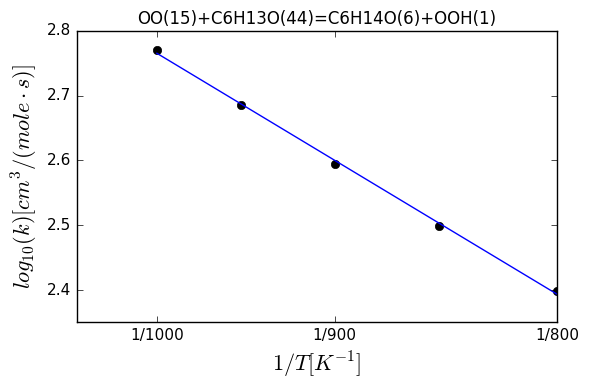

In [7]:
ln_A = []
E_a = []
kin = {}
comparisonKin = {}
inverseTemps = np.linspace(1000./800., 1000/2500., 15)
Temps = 1000./inverseTemps
comparisonPressure = 1e5
for i in range(len(df['Kinetics'])):
    print i
    obj = str(df['Kinetics'].iloc[i])
    print obj
    if obj != "nan" :
        kinetics = df['Kinetics'].iloc[i]
        reaction = df['Reaction'].iloc[i]
        print type(kinetics)

        kinList = []
        for Temp in Temps:
            kinList.append(np.log10(kinetics.getRateCoefficient(T=Temp, P=comparisonPressure)))
        kin[reaction] = kinList
        rate = kinetics.getRateCoefficient(T=1000, P=comparisonPressure)
        comparisonKin[reaction] = rate
        
        lnA, Ea = getParameters(kinetics, reaction)
        
        #print A
        ln_A.append(lnA)

        
        #print Ea
        E_a.append(Ea)
        comparisonKin[reaction] = [rate, Ea, lnA]

ln_A = np.array(ln_A)
E_a = np.array(E_a)



# Creates a combined plot for the arrhenius expressions. Colors are different for each initial molecule

C8H18(2)
C8H18(2)
C8H18(2)
C8H18(2)
C8H18(2)
C8H18(2)
C8H18(2)
C8H18(2)
C8H18(2)
C8H18(2)
C8H18(2)
C8H18(2)
C8H18(2)
C8H18(2)
C8H18(2)
C8H18(3)
C8H18(3)
C8H18(3)
C8H18(3)
C8H18(3)
C8H18(3)
C8H18(3)
C8H18(3)
C8H18(3)
C8H18(3)
C8H18(3)
C8H18(3)
C8H18(3)
C8H18(3)
C8H18(3)
C8H18(4)
C8H18(4)
C8H18(4)
C8H18(4)
C8H18(4)
C8H18(4)
C8H18(4)
C8H18(4)
C8H18(4)
C8H18(4)
C8H18(4)
C8H18(4)
C8H18(4)
C8H18(4)
C8H18(4)
C5H12O(5)
C5H12O(5)
C5H12O(5)
C5H12O(5)
C5H12O(5)
C5H12O(5)
C5H12O(5)
C5H12O(5)
C5H12O(5)
C5H12O(5)
C5H12O(5)
C5H12O(5)
C5H12O(5)
C5H12O(5)
C5H12O(5)
C6H14O(6)
C6H14O(6)
C6H14O(6)
C6H14O(6)
C6H14O(6)
C6H14O(6)
C6H14O(6)
C6H14O(6)
C6H14O(6)
C6H14O(6)
C6H14O(6)
C6H14O(6)
C6H14O(6)
C6H14O(6)
C6H14O(6)
C9H18(7)
C9H18(7)
C9H18(7)
C9H18(7)
C9H18(7)
C9H18(7)
C9H18(7)
C9H18(7)
C9H18(7)
C9H18(7)
C9H18(7)
C9H18(7)
C9H18(7)
C9H18(7)
C9H18(7)
C6H12(8)
C6H12(8)
C6H12(8)
C6H12(8)
C6H12(8)
C6H12(8)
C6H12(8)
C6H12(8)
C6H12(8)
C6H12(8)
C6H12(8)
C6H12(8)
C6H12(8)
C6H12(8)
C6H12(8)
Ocimene(9)
Ocimene(9)
Oci

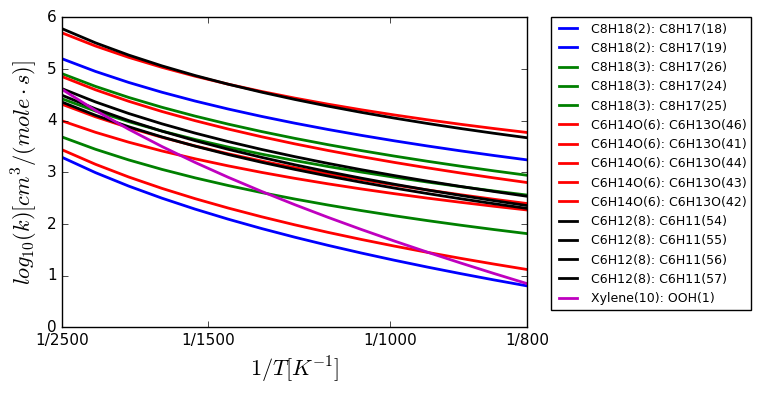

In [8]:
fig, ax = plt.subplots()

for i in range(len(mols)):
    color = colors[i]
    
    for j in range(len(kin.keys())):
        print mols[i]
        if mols[i] in kin.keys()[j]:
            
            rates = kin.values()[j]
            reaction = kin.keys()[j]
            r,p = reaction.split('=')
            r1, r2 = r.split('+')
            p1, p2 = r.split('+')
            rxn = [r1, r2, p1, p2]
            for r in rxn:
                if "OO" or "OOH" or mol not in r:
                    label = mols[i] + ': ' +r 

            plt.plot(inverseTemps, rates, color, label=str(label), linewidth=2 )
            plt.xlabel("$1/T [K^{-1}]$", fontsize=16)
            plt.ylabel("$log_{10}(k) [cm^3 / (mole \cdot s)]$", fontsize=16)

            Tticks = [800, 1000, 1500, 2500]
            ax.set_xticks([1000./T for T in Tticks])
            ax.set_xticklabels(['1/{:.0f}'.format(T) for T in Tticks])
            plt.tick_params(axis='x', labelsize=11)
            plt.tick_params(axis='y', labelsize=11)
plt.show
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=9)
#plt.title("Combined reaction rates")
#plt.legend(fontsize=8, loc=0)
fig.savefig('combined.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

# Arrhenius plots for each species

/Users/nathan/anaconda/envs/rmg_env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


C8H18(2)
C8H18(2)


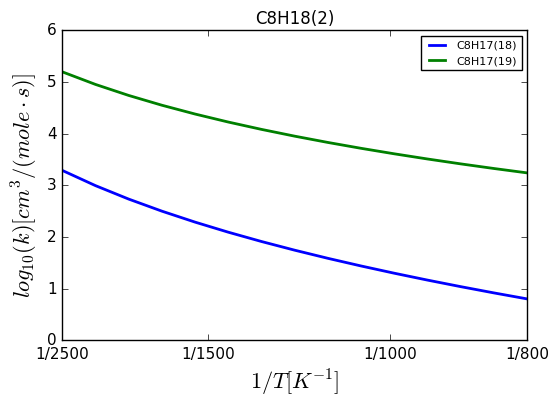

C8H18(3)
C8H18(3)
C8H18(3)


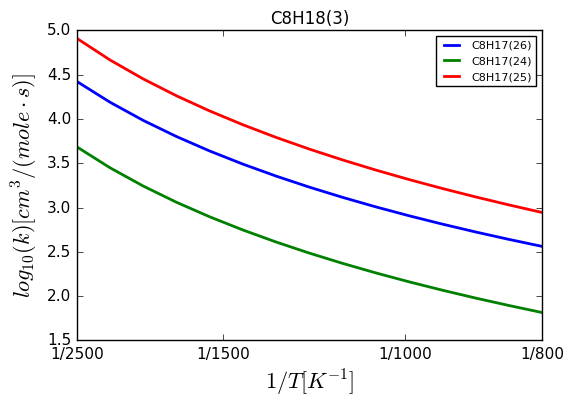

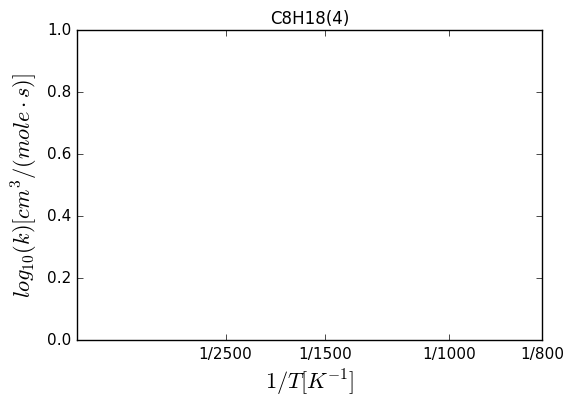

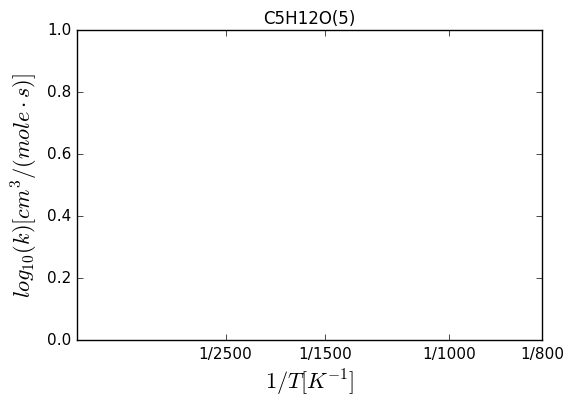

C6H14O(6)
C6H14O(6)
C6H14O(6)
C6H14O(6)
C6H14O(6)


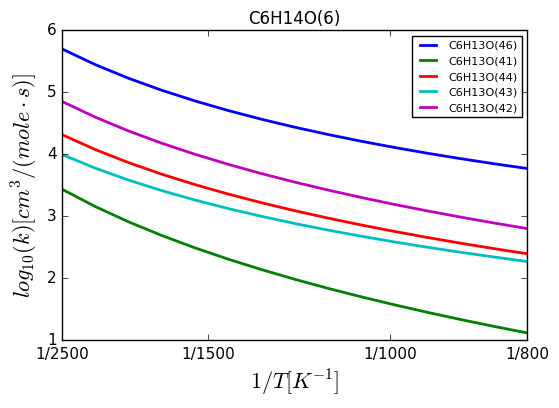

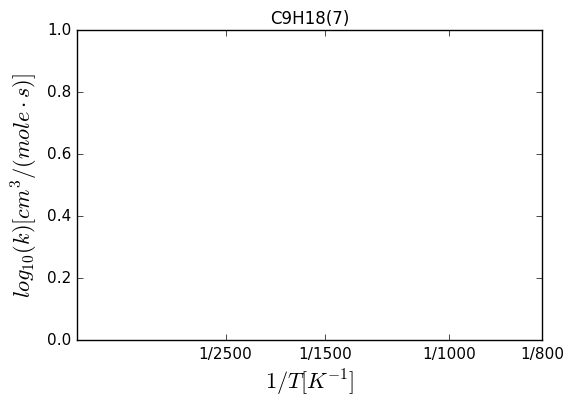

C6H12(8)
C6H12(8)
C6H12(8)
C6H12(8)


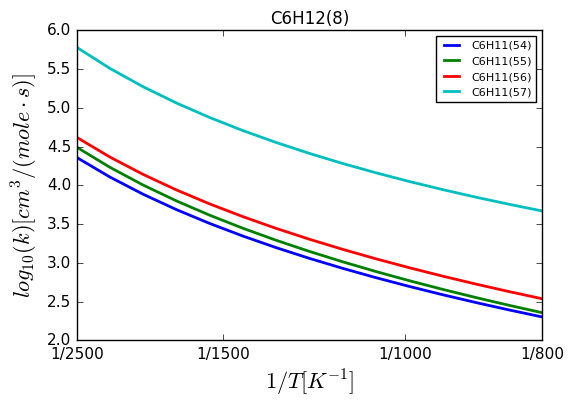

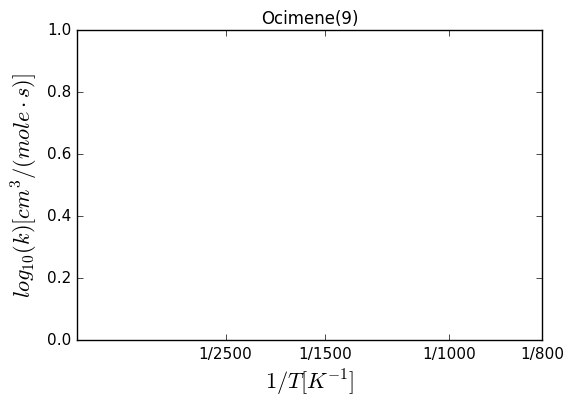

Xylene(10)


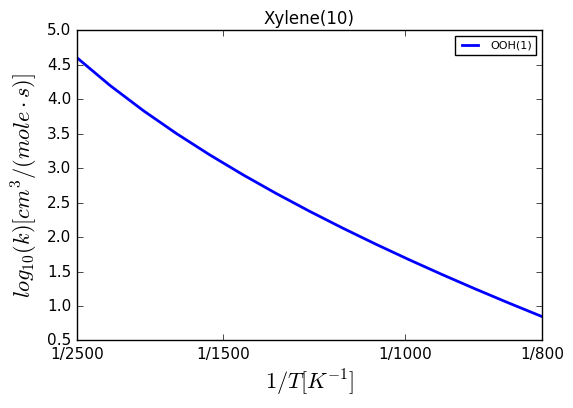

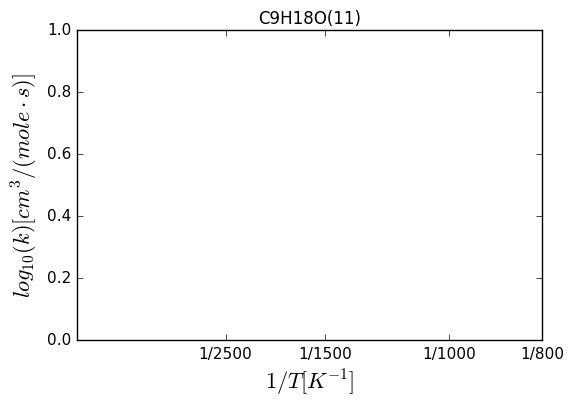

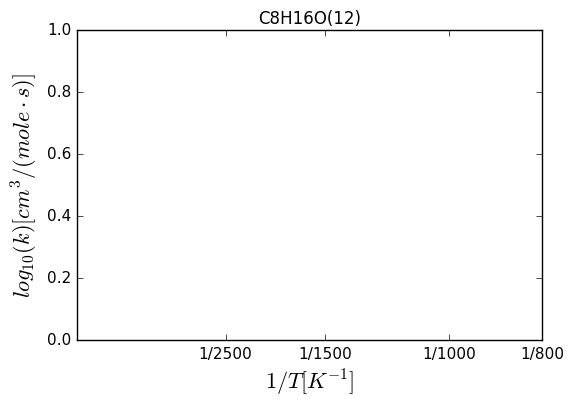

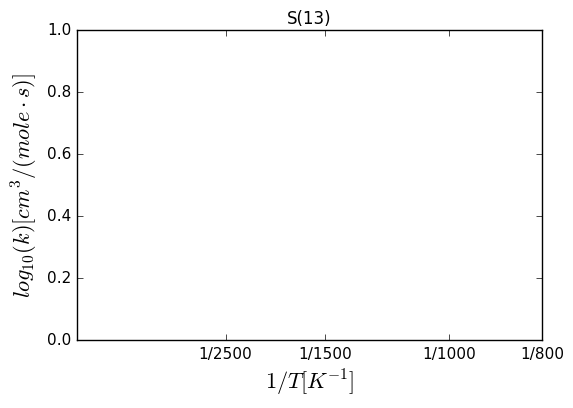

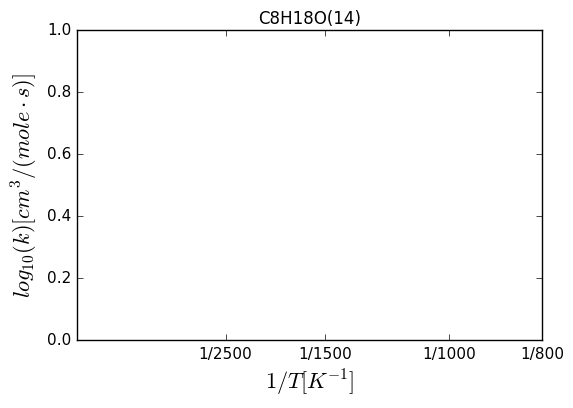

In [9]:
# for reactions split up by different starting species
for mol in mols:
    fig, ax = plt.subplots()
    #title = mol.split('(')[0]
    plt.title(mol)
    for i in range(len(kin.keys())):
        
        
        if mol in kin.keys()[i]:
            print mol
            rates = kin.values()[i]
            reaction = kin.keys()[i]
            
            r,p = reaction.split('=')
            r1, r2 = r.split('+')
            p1, p2 = r.split('+')
            rxn = [r1, r2, p1, p2]
            for r in rxn:
                if "OO" or "OOH" or mol not in r:
                    label = r
            plt.plot(inverseTemps, rates, label=str(label), linewidth=2)
        plt.xlabel("$1/T [K^{-1}]$", fontsize=16)
        plt.ylabel("$log_{10}(k) [cm^3 / (mole \cdot s)]$", fontsize=16)

        Tticks = [800, 1000, 1500, 2500]
        ax.set_xticks([1000./T for T in Tticks])
        ax.set_xticklabels(['1/{:.0f}'.format(T) for T in Tticks])
        plt.tick_params(axis='x', labelsize=11)
        plt.tick_params(axis='y', labelsize=11)
        plt.legend(fontsize=8)
    plt.show()
    fig.tight_layout
    fig.savefig(str(mol)+'.pdf')


# Creates plots for the two factor Arrhenius prefactor vs the two factor activation energy

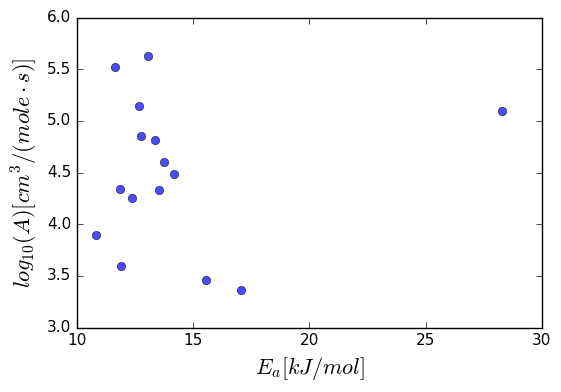

In [10]:
fig, ax = plt.subplots()
plt.plot(E_a, ln_A, 'ob', alpha = 0.7, label=str(reaction))
plt.xlabel("$E_a [kJ / mol]$", fontsize=16)
plt.ylabel("$log_{10}(A) [cm^3 / (mole \cdot s)]$", fontsize=16)


plt.tick_params(axis='x', labelsize=11)
plt.tick_params(axis='y', labelsize=11)
#plt.legend()
fig.savefig("ln_AvsE_a.pdf")

In [11]:
image_directory = "./species/"

imagelist = []
for filename in os.listdir(image_directory):
    imagelist.append(image_directory + filename)

In [12]:
for i in range(len(kin.keys())):
    rates = kin.values()[i]
    reaction = kin.keys()[i]
    left, right = reaction.split('=')

    if "OOH" in left:
        print left
        a,b = left.split('+')
        if "OOH" not in a:
            species = b
            print a
        else:
            species = a
            print b
    else:
        print right
        a,b = right.split('+')
        if "OOH" not in a:
            species = a
            print a
        else:
            species = b
            print b
    identifier, number = species.split('(')
    number = '(' + number 
    for image in imagelist:
        if number in image:
            print image
            #myImage = Image.open(image)

#myImage

C6H14O(6)+OOH(1)
C6H14O(6)
./species/2-Methyl-1-pentanol(6).png
C8H18(3)+OOH(1)
C8H18(3)
./species/2,4-Dimethylhexane(3).png
C8H18(3)+OOH(1)
C8H18(3)
./species/2,4-Dimethylhexane(3).png
C8H18(2)+OOH(1)
C8H18(2)
./species/2,2,4-Trimethylpentane(2).png
C6H14O(6)+OOH(1)
C6H14O(6)
./species/2-Methyl-1-pentanol(6).png
C6H14O(6)+OOH(1)
C6H14O(6)
./species/2-Methyl-1-pentanol(6).png
C6H14O(6)+OOH(1)
C6H14O(6)
./species/2-Methyl-1-pentanol(6).png
C6H12(8)+OOH(1)
C6H12(8)
./species/methylcyclopentane(8).png
C6H12(8)+OOH(1)
C6H12(8)
./species/methylcyclopentane(8).png
C8H18(2)+OOH(1)
C8H18(2)
./species/2,2,4-Trimethylpentane(2).png
C8H18(3)+OOH(1)
C8H18(3)
./species/2,4-Dimethylhexane(3).png
Xylene(10)+OOH(1)
Xylene(10)
./species/OOH(1).png
C6H12(8)+OOH(1)
C6H12(8)
./species/methylcyclopentane(8).png
C6H14O(6)+OOH(1)
C6H14O(6)
./species/2-Methyl-1-pentanol(6).png
C6H12(8)+OOH(1)
C6H12(8)
./species/methylcyclopentane(8).png


# Creating the table of all the info needed for each abstraction. w/ two factor information and rates at 1000 K, 1e5 Pa

In [13]:
comparisonKin

{'OO(15)+C6H11(54)=C6H12(8)+OOH(1)': [514.3977977703237,
  13.514650260587878,
  4.3311700331878207],
 'OO(15)+C6H11(55)=C6H12(8)+OOH(1)': [611.0619583798766,
  14.175419393670451,
  4.4853486258545168],
 'OO(15)+C6H11(56)=C6H12(8)+OOH(1)': [897.7084745547602,
  13.742017842359045,
  4.6003390819723773],
 'OO(15)+C6H11(57)=C6H12(8)+OOH(1)': [11626.329506614371,
  13.065694738591809,
  5.6304793154038464],
 'OO(15)+C6H13O(41)=C6H14O(6)+OOH(1)': [38.94202624504764,
  15.572318606937868,
  3.4573657978223862],
 'OO(15)+C6H13O(42)=C6H14O(6)+OOH(1)': [1613.8218413487289,
  13.378184627594818,
  4.8112560689801205],
 'OO(15)+C6H13O(43)=C6H14O(6)+OOH(1)': [398.4156604582348,
  10.838577414522454,
  3.8988232071238405],
 'OO(15)+C6H13O(44)=C6H14O(6)+OOH(1)': [590.0468373410484,
  12.36228349260081,
  4.2523106277587983],
 'OO(15)+C6H13O(46)=C6H14O(6)+OOH(1)': [13333.062652773344,
  11.657656299424147,
  5.520934231566228],
 'OO(15)+C8H17(18)=C8H18(2)+OOH(1)': [20.78880641104884,
  17.053892320

In [14]:
from collections import defaultdict
newDict = defaultdict(list)
for mol in mols:
    for reaction in comparisonKin.keys():
        if mol in reaction:
            
            newDict[mol].append((reaction, comparisonKin[reaction]))
newDict

defaultdict(list,
            {'C6H12(8)': [('OO(15)+C6H11(54)=C6H12(8)+OOH(1)',
               [514.3977977703237, 13.514650260587878, 4.3311700331878207]),
              ('OO(15)+C6H11(55)=C6H12(8)+OOH(1)',
               [611.0619583798766, 14.175419393670451, 4.4853486258545168]),
              ('OO(15)+C6H11(56)=C6H12(8)+OOH(1)',
               [897.7084745547602, 13.742017842359045, 4.6003390819723773]),
              ('OO(15)+C6H11(57)=C6H12(8)+OOH(1)',
               [11626.329506614371, 13.065694738591809, 5.6304793154038464])],
             'C6H14O(6)': [('OO(15)+C6H13O(46)=C6H14O(6)+OOH(1)',
               [13333.062652773344, 11.657656299424147, 5.520934231566228]),
              ('OO(15)+C6H13O(41)=C6H14O(6)+OOH(1)',
               [38.94202624504764, 15.572318606937868, 3.4573657978223862]),
              ('OO(15)+C6H13O(44)=C6H14O(6)+OOH(1)',
               [590.0468373410484, 12.36228349260081, 4.2523106277587983]),
              ('OO(15)+C6H13O(43)=C6H14O(6)+OOH(1)',
 

In [15]:
newDict = defaultdict(list)
for mol in mols:
    for reaction in comparisonKin.keys():
        if mol in reaction:
            newDict['molecule'].append(mol)
            newDict['reaction'].append(reaction)
            rate, Ea, lnA =  comparisonKin[reaction]
            newDict['rate'].append(rate)
            newDict['Ea'].append(Ea)
            newDict['lnA'].append(lnA)
dfs = pd.DataFrame(newDict)
dfs

,Ea,lnA,molecule,rate,reaction
0,17.053892,3.362815,C8H18(2),20.788806,OO(15)+C8H17(18)=C8H18(2)+OOH(1)
1,12.669333,5.143337,C8H18(2),4217.220594,OO(15)+C8H17(19)=C8H18(2)+OOH(1)
2,11.859974,4.340985,C8H18(3),831.618011,OO(15)+C8H17(26)=C8H18(3)+OOH(1)
3,11.884769,3.598102,C8H18(3),149.315276,OO(15)+C8H17(24)=C8H18(3)+OOH(1)
4,12.747339,4.857275,C8H18(3),2135.944294,OO(15)+C8H17(25)=C8H18(3)+OOH(1)
5,11.657656,5.520934,C6H14O(6),13333.062653,OO(15)+C6H13O(46)=C6H14O(6)+OOH(1)
6,15.572319,3.457366,C6H14O(6),38.942026,OO(15)+C6H13O(41)=C6H14O(6)+OOH(1)
7,12.362283,4.252311,C6H14O(6),590.046837,OO(15)+C6H13O(44)=C6H14O(6)+OOH(1)
8,10.838577,3.898823,C6H14O(6),398.415660,OO(15)+C6H13O(43)=C6H14O(6)+OOH(1)
9,13.378185,4.811256,C6H14O(6),1613.821841,OO(15)+C6H13O(42)=C6H14O(6)+OOH(1)


# $\ln(k) = -\frac{E_a}{R} \cdot \frac{1}{T} + \ln(A)$

# $k = A \cdot T^n \cdot \exp(-\frac{E_a}{R\cdot T})$

# $k = A \cdot \exp(-\frac{E_a}{R\cdot T})$